# Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd
from tensorflow.keras import metrics

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/football-player-image-dataset/Football Player Face/Lionel Messi/Screenshot 2023-11-26 223352.png
/kaggle/input/football-player-image-dataset/Football Player Face/Lionel Messi/opera_mlxDKwtwO3.png
/kaggle/input/football-player-image-dataset/Football Player Face/Lionel Messi/opera_PrzBdLoRwm.png
/kaggle/input/football-player-image-dataset/Football Player Face/Lionel Messi/opera_Z7VQWFuh1f.png
/kaggle/input/football-player-image-dataset/Football Player Face/Lionel Messi/Screenshot 2023-11-26 214846.png
/kaggle/input/football-player-image-dataset/Football Player Face/Lionel Messi/Screenshot 2023-11-26 222029.png
/kaggle/input/football-player-image-dataset/Football Player Face/Lionel Messi/opera_ZXavzQAiPD.png
/kaggle/input/football-player-image-dataset/Football Player Face/Lionel Messi/Screenshot 2023-11-27 155950.png
/kaggle/input/football-player-image-dataset/Football Player Face/Lionel Messi/Screenshot 2023-11-26 220206.png
/kaggle/input/football-player-image-dataset/Footb

# LOAD TENSORFLOW DATASET

In [3]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [4]:
X=[]
Z=[]
IMG_SIZE=256
Toni_Kroos_DIR='/kaggle/input/football-player-image-dataset/Football Player Face/Kroos'
Thibaut_Courtois_DIR='/kaggle/input/football-player-image-dataset/Football Player Face/Courtois'
Paul_Pogba_DIR='/kaggle/input/football-player-image-dataset/Football Player Face/Pogba'
Mohamed_Salah_DIR='/kaggle/input/football-player-image-dataset/Football Player Face/Mohamed Salah'
Lionel_Messi_DIR='/kaggle/input/football-player-image-dataset/Football Player Face/Lionel Messi'
Cristiano_Ronaldo_DIR='/kaggle/input/football-player-image-dataset/Football Player Face/Cristiano Ronaldo'

In [5]:
def assign_label(img,nama_pemain):
    return nama_pemain

In [6]:
def make_train_data(nama_pemain,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,nama_pemain)
        
        try:
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        except Exception as e:
            print(str(e))
        
        X.append(np.array(img))
        Z.append(str(label))

In [7]:
seen = set()
for item in Z:
    if item not in seen:
        print(item, end=' ')
        seen.add(item)

In [8]:
make_train_data('Kroos',Toni_Kroos_DIR)
print(len(X))

100%|██████████| 550/550 [00:06<00:00, 85.93it/s] 

550


In [9]:
make_train_data('Courtois',Thibaut_Courtois_DIR)
print(len(X))

100%|██████████| 550/550 [00:06<00:00, 90.26it/s] 

1100


In [10]:
make_train_data('Pogba',Paul_Pogba_DIR)
print(len(X))

100%|██████████| 550/550 [00:06<00:00, 90.39it/s] 

1650


In [11]:
make_train_data('Mohamed Salah',Mohamed_Salah_DIR)
print(len(X))

100%|██████████| 550/550 [00:04<00:00, 120.88it/s]

2200


In [12]:
make_train_data('Lionel Messi',Lionel_Messi_DIR)
print(len(X))

100%|██████████| 550/550 [00:04<00:00, 124.50it/s]

2750


In [13]:
make_train_data('Cristiano Ronaldo',Cristiano_Ronaldo_DIR)
print(len(X))

100%|██████████| 550/550 [00:05<00:00, 107.21it/s]

3300


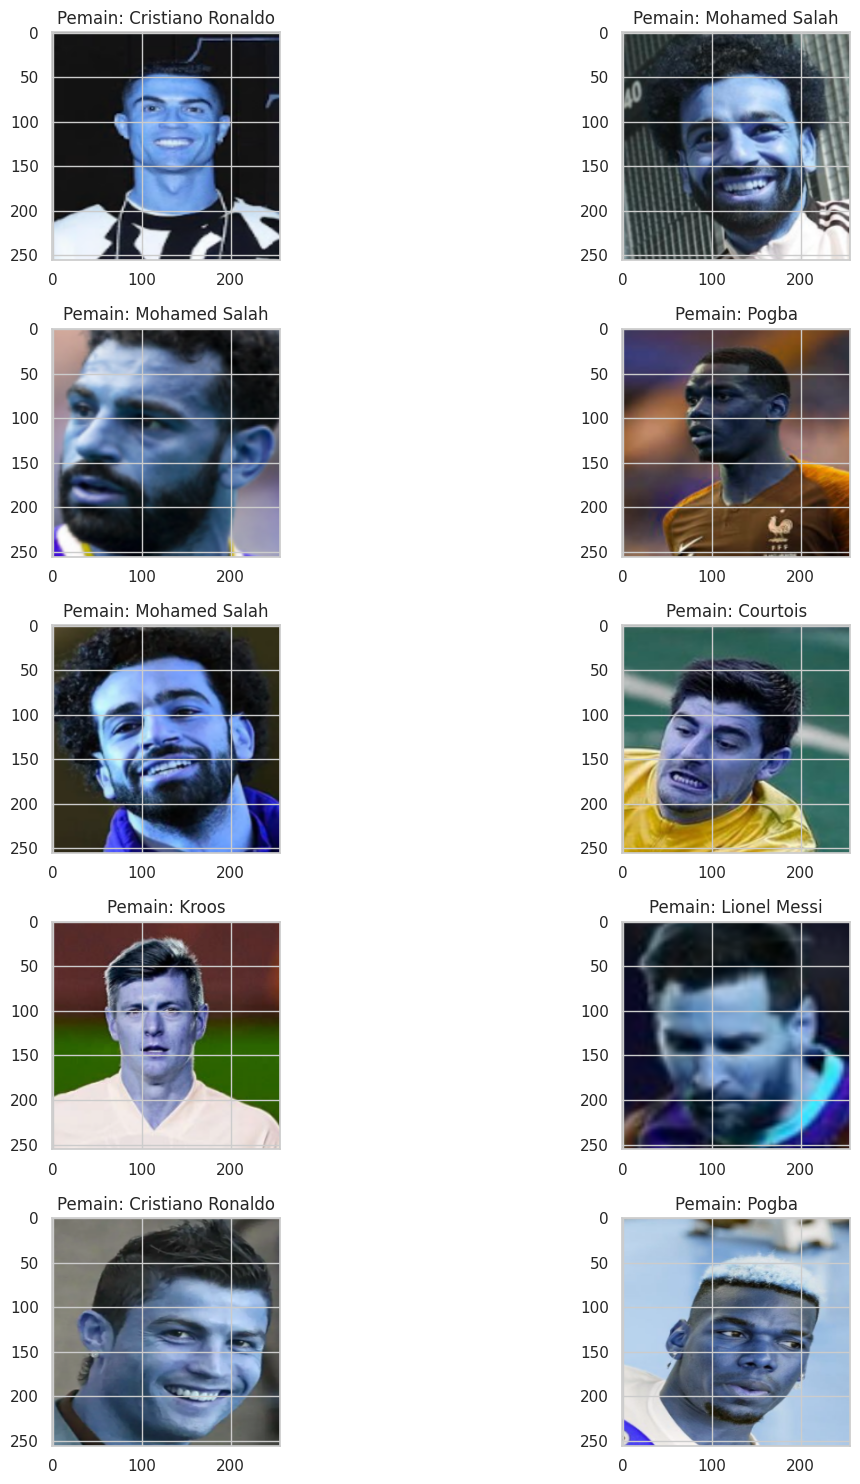

In [14]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Pemain: '+Z[l])

plt.tight_layout()

In [15]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,6)
X=np.array(X)
X=X/255

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

2640
2640
660
660


In [18]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [19]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())


model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation = "softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 64)        0

In [21]:
batch_size=32
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [22]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [23]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
82/82 [==============================] - 126s 2s/step - loss: 1.6209 - accuracy: 0.3225 - val_loss: 1.3596 - val_accuracy: 0.4682
Epoch 2/50
82/82 [==============================] - 123s 1s/step - loss: 1.2681 - accuracy: 0.5203 - val_loss: 1.0614 - val_accuracy: 0.6121
Epoch 3/50
82/82 [==============================] - 123s 1s/step - loss: 1.1074 - accuracy: 0.5809 - val_loss: 0.9011 - val_accuracy: 0.6667
Epoch 4/50
82/82 [==============================] - 123s 1s/step - loss: 1.0096 - accuracy: 0.6281 - val_loss: 0.9185 - val_accuracy: 0.6909
Epoch 5/50
82/82 [==============================] - 122s 1s/step - loss: 0.9325 - accuracy: 0.6534 - val_loss: 0.7762 - val_accuracy: 0.7227
Epoch 6/50
82/82 [==============================] - 122s 1s/step - loss: 0.8768 - accuracy: 0.6829 - val_loss: 0.7217 - val_accuracy: 0.7364
Epoch 7/50
82/82 [==============================] - 122s 1s/step - loss: 0.8164 - accuracy: 0.7044 - val_loss: 0.7867 - val_accuracy: 0.7227
Epoch 8/50
82

In [25]:
# Evaluasi model
results = model.evaluate(x_test, y_test)

# Menampilkan hasil evaluasi
print("Loss:", results[0])
print("Accuracy:", results[1])

21/21 [==============================] - 7s 328ms/step - loss: 0.4822 - accuracy: 0.8652
Loss: 0.4822419583797455
Accuracy: 0.8651515245437622


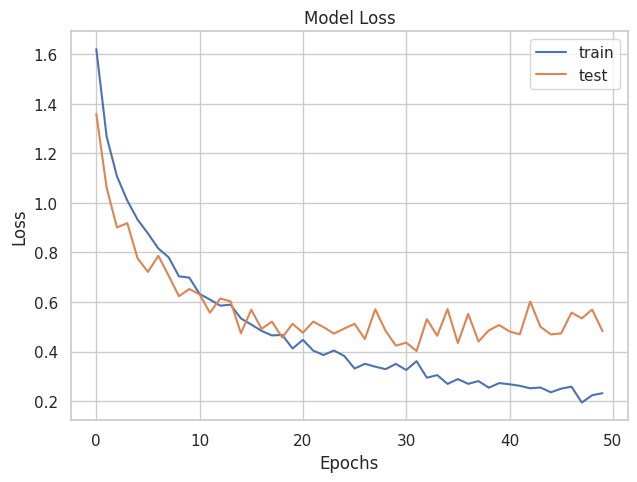

In [26]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

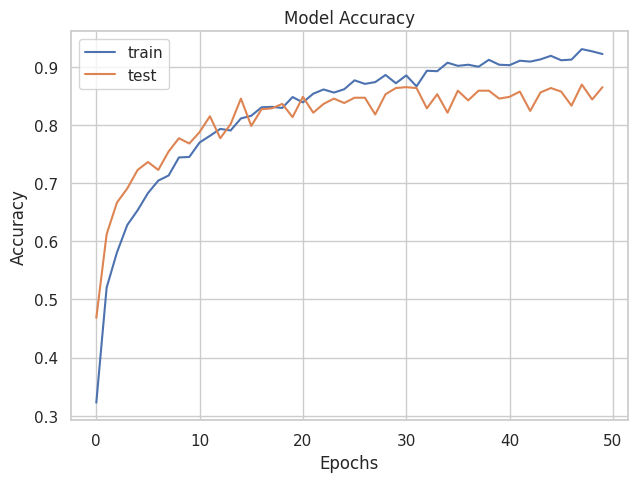

In [27]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [28]:
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)

21/21 [==============================] - 14s 642ms/step


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       111
           1       0.80      0.80      0.80       103
           2       0.85      0.90      0.87       133
           3       0.91      0.87      0.89       107
           4       0.95      0.90      0.92       108
           5       0.90      0.89      0.89        98

    accuracy                           0.87       660
   macro avg       0.87      0.86      0.87       660
weighted avg       0.87      0.87      0.87       660



In [30]:
class_names = []
seen = set()
for item in Z:
    if item not in seen:
        print(item, end=' ')
        seen.add(item)
        class_names.append(item)

Kroos Courtois Pogba Mohamed Salah Lionel Messi Cristiano Ronaldo 

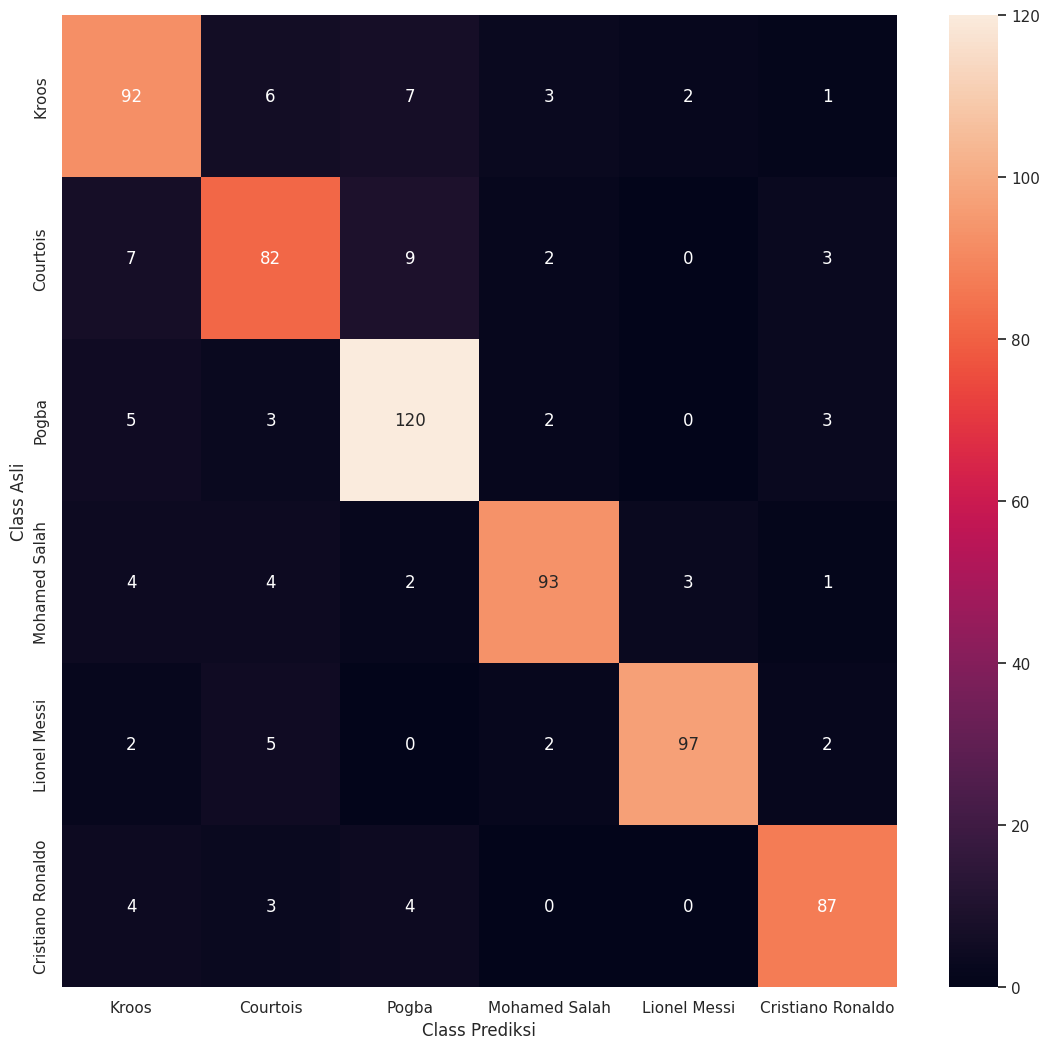

In [31]:
import seaborn as sn
cm = tf.math.confusion_matrix(y_true, y_pred_classes)

f,ax=plt.subplots(figsize=(12,12))
sns.heatmap(cm,annot=True,fmt='.0f')
plt.xlabel('Class Prediksi')
plt.ylabel('Class Asli')
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
plt.show()

In [32]:
# Assuming you have a model already trained and x_test prepared
pred_probs = model.predict(x_test)
pred_digits = np.argmax(pred_probs, axis=1)

# Now, you can use pred_digits in your code
# now storing some properly as well as misclassified indexes'.
i = 0
prop_class = []
mis_class = []

for i in range(len(y_test)):
    if np.argmax(y_test[i]) == pred_digits[i]:
        prop_class.append(i)
    if len(prop_class) == 8:
        break

i = 0
for i in range(len(y_test)):
    if not np.argmax(y_test[i]) == pred_digits[i]:
        mis_class.append(i)
    if len(mis_class) == 8:
        break

21/21 [==============================] - 7s 336ms/step


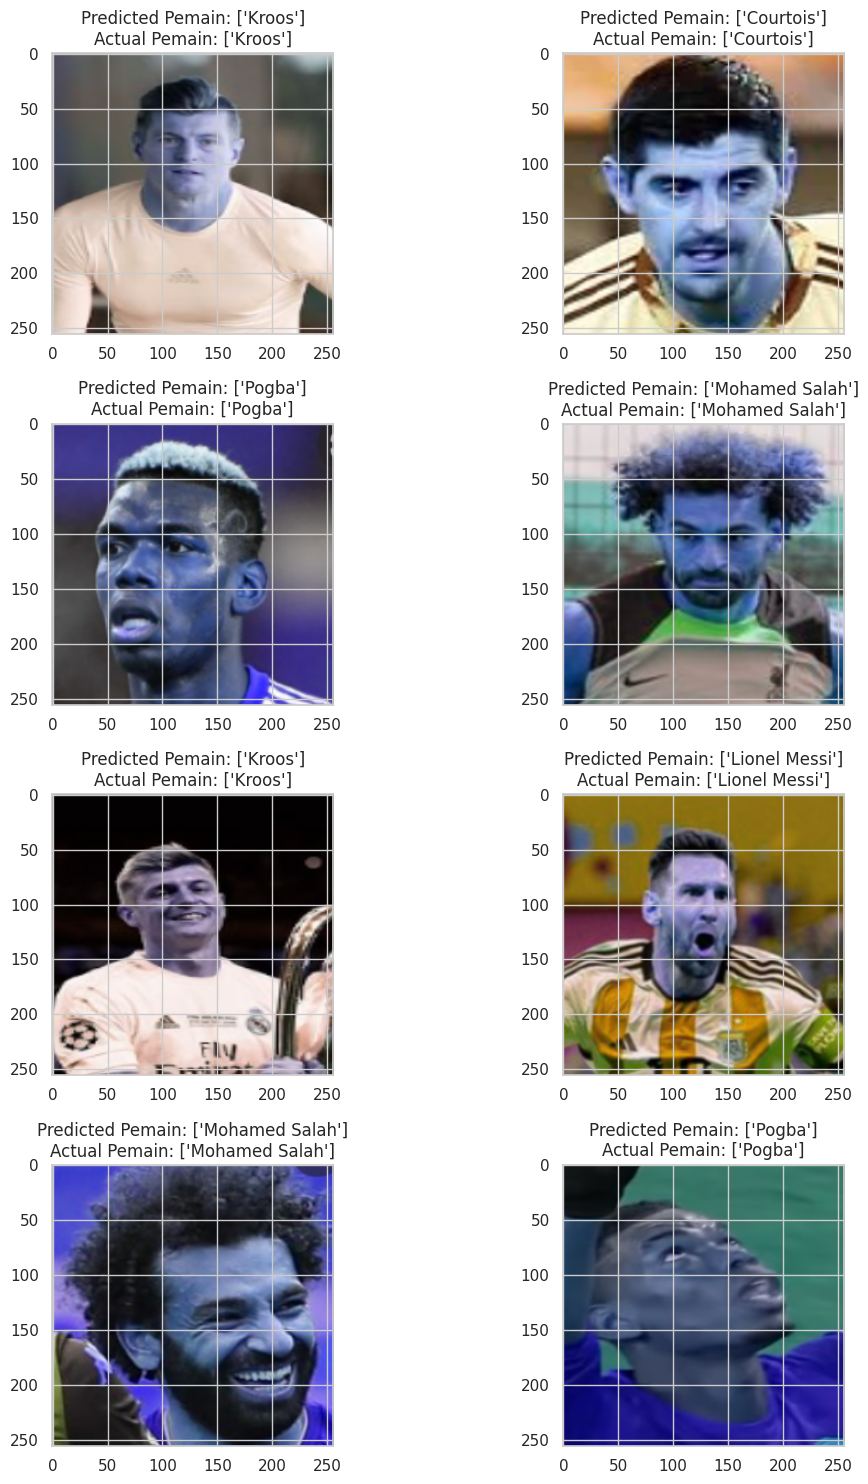

In [33]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)

for i in range(4):
    for j in range(2):
        # Pastikan prop_class[count] memiliki nilai yang valid
        index = prop_class[count]

        # Pastikan pred_digits[index] dan y_test[index] memiliki bentuk yang sesuai
        pred_label = pred_digits[index].ravel()
        actual_label = np.argmax([y_test[index]]).ravel()

        ax[i, j].imshow(x_test[index])
        ax[i, j].set_title("Predicted Pemain: " + str(le.inverse_transform([pred_label])) +
                           "\nActual Pemain: " + str(le.inverse_transform(actual_label)))

        plt.tight_layout()
        count += 1


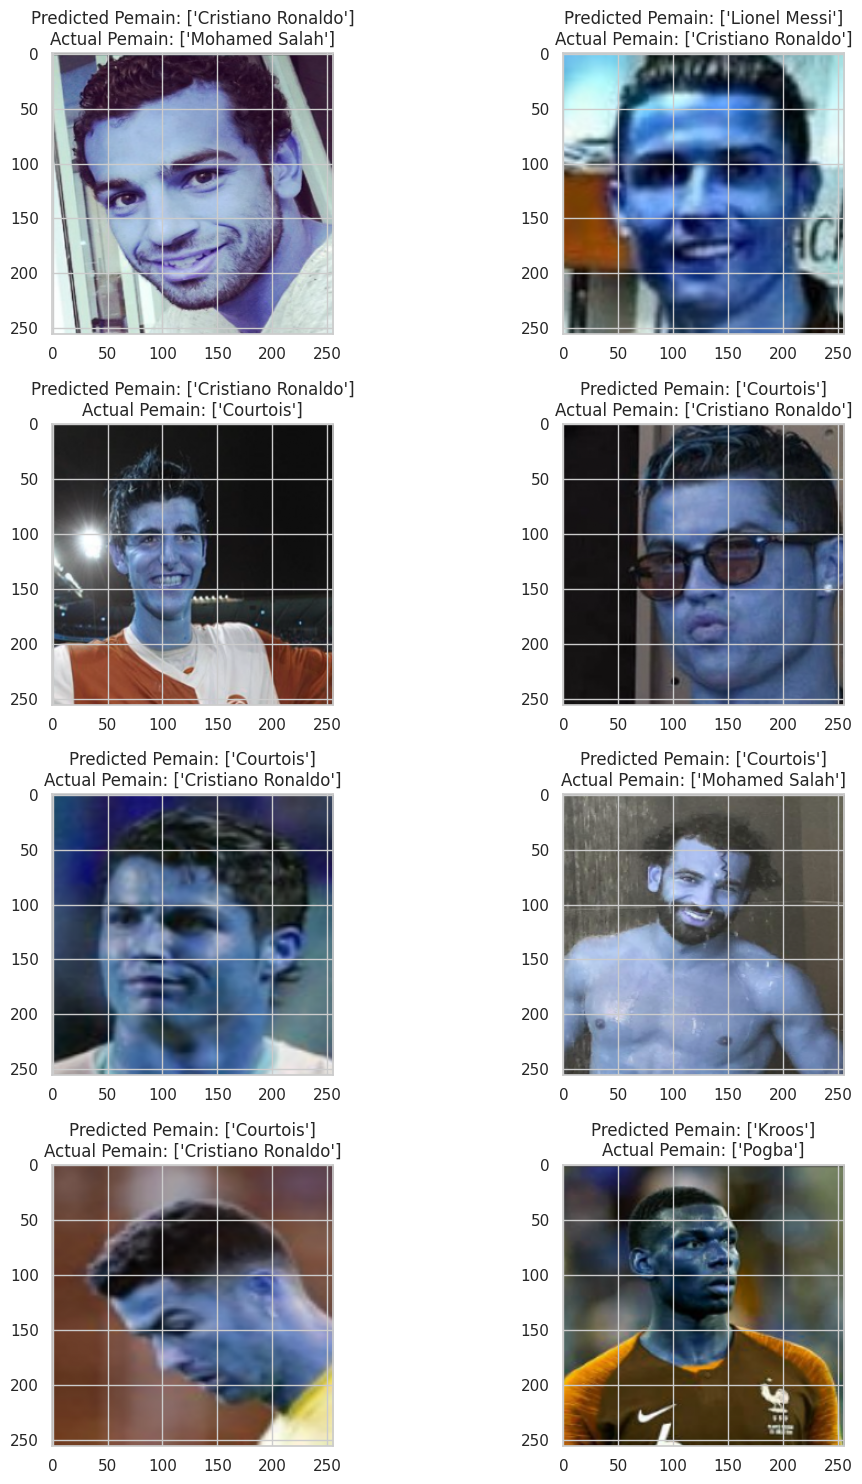

In [34]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)

for i in range(4):
    for j in range(2):
        # Pastikan mis_class[count] memiliki nilai yang valid
        index = mis_class[count]

        # Pastikan pred_digits[index] dan y_test[index] memiliki bentuk yang sesuai
        pred_label = pred_digits[index].ravel()
        actual_label = np.argmax([y_test[index]]).ravel()

        ax[i, j].imshow(x_test[index])
        ax[i, j].set_title("Predicted Pemain: " + str(le.inverse_transform([pred_label])) +
                           "\nActual Pemain: " + str(le.inverse_transform(actual_label)))

        plt.tight_layout()
        count += 1